##  TCC - Inteligência Artificial e Aprendizado de Máquina 
###  PUC Minas
#### André Guerra

### IDENTIFICAÇÃO DE OPORTUNIDADES DE CROSS SELLING USANDO AUTOML ###

Base de dados:
Kaggle - https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

Plataforma de AutoML 
PyCaret

In [1]:
#Instalação do Pycaret
#!pip install pycaret


In [2]:
#Importação das libs necessárias
import pandas as pd
from pycaret.classification import *
from sklearn.impute import SimpleImputer
import seaborn as sns

In [3]:
#Carregamento da base de dados
ds = pd.read_csv("train.csv")

In [4]:
#Mostra as primeiras linhas do dataset
ds.head()


id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
ds.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [7]:
#Experimentação com limpeza previa dos dados
#ds.drop(['id', 'Region_Code','Annual_Premium','Policy_Sales_Channel'], axis=1, inplace=True)
#gender_mapper = {'Male': 0, 'Female': 1} 
#ds['Gender'].replace(gender_mapper, inplace=True)
#age_mapper = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
#ds['Vehicle_Age'].replace(age_mapper, inplace=True)
#ds.head()

In [8]:
#Seleciona uma porção aleatória dos dados da base de treino
ds = ds.sample(frac=0.10, replace=True, random_state=1)


In [9]:
#Checa valores faltantes
ds.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
ds.drop_duplicates(keep='first')

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
128037  128038    Male   48                1         28.0                   0   
267336  267337  Female   43                1         36.0                   1   
312201  312202    Male   45                1         28.0                   1   
371403  371404  Female   39                1         41.0                   0   
73349    73350  Female   27                1         11.0                   1   
...        ...     ...  ...              ...          ...                 ...   
162894  162895    Male   27                1          3.0                   1   
60746    60747  Female   40                1         28.0                   1   
14329    14330    Male   77                1         28.0                   0   
6563      6564    Male   23                1          8.0                   1   
257972  257973    Male   61                1         21.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
128037    1-2 Year            Yes         36996.0                 124.0   
267336    1-2 Year             No         35142.0                 152.0   
312201    1-2 Year             No         33735.0                 124.0   
371403    1-2 Year            Yes         27136.0                 156.0   
73349     < 1 Year             No         26584.0                 152.0   
...            ...            ...             ...                   ...   
162894    < 1 Year             No          2630.0                 152.0   
60746     1-2 Year             No         45414.0                  26.0   
14329    > 2 Years            Yes         44669.0                 124.0   
6563      1-2 Year             No         44705.0                 124.0   
257972   > 2 Years            Yes         37827.0                  26.0   

        Vintage  Response  
128037      214         1  
267336      108         0  
312201      120         0  
371403      233         0  
73349       295         0  
...         ...       ...  
162894      160         0  
60746       225         0  
14329       271         0  
6563        282         0  
257972       56         1  

[36314 rows x 12 columns]

<AxesSubplot:>

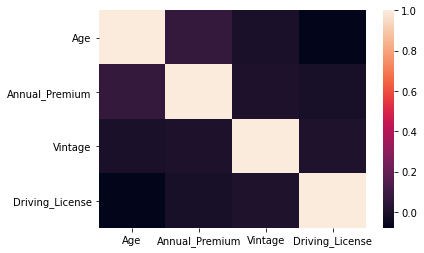

In [11]:
sns.heatmap(ds[['Age','Annual_Premium','Vintage','Driving_License']].corr())

<AxesSubplot:>

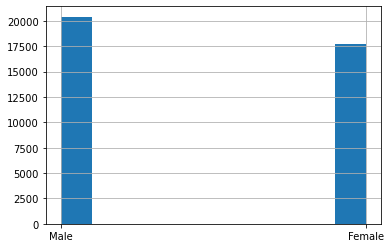

In [12]:
ds['Gender'].hist()

<AxesSubplot:>

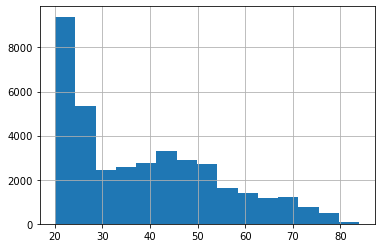

In [13]:
ds['Age'].hist(bins=15)

<AxesSubplot:>

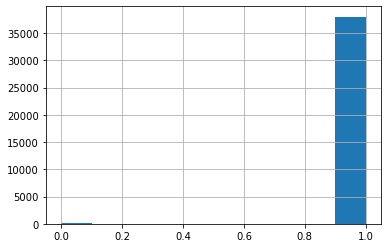

In [14]:
ds['Driving_License'].hist()

<AxesSubplot:>

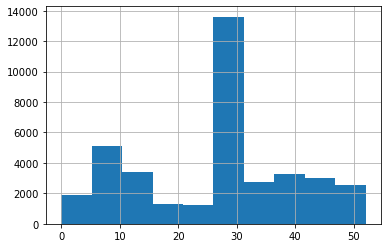

In [15]:
ds['Region_Code'].hist()

<AxesSubplot:>

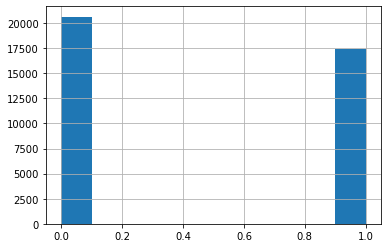

In [16]:
ds['Previously_Insured'].hist()

<AxesSubplot:>

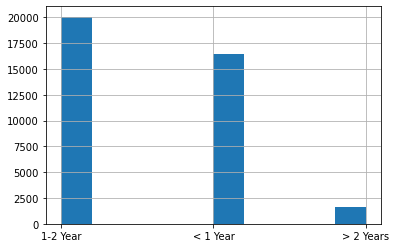

In [31]:
ds['Vehicle_Age'].hist()

<AxesSubplot:>

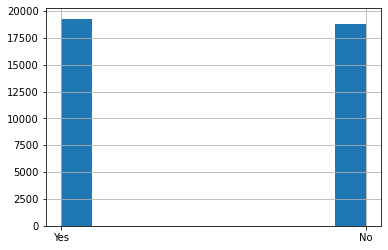

In [32]:
ds['Vehicle_Damage'].hist()

<AxesSubplot:>

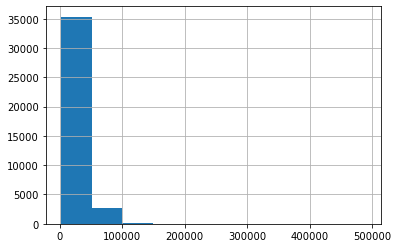

In [36]:
ds['Annual_Premium'].hist(bins=10)

0    33489
1     4622
Name: Response, dtype: int64

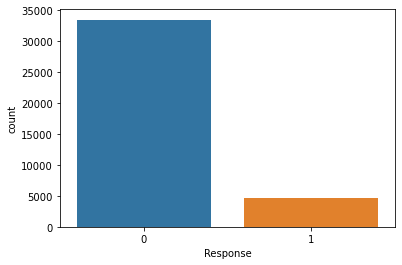

In [12]:
#Verifica a quantidade de elementos por classe
sns.countplot(x=ds["Response"], data=ds)
ds['Response'].value_counts()

In [13]:
#Cria o modelo identificando a variável alvo
model = setup(ds, target = 'Response', fix_imbalance=True, normalize = True, pca = True, 
              feature_selection = True, feature_selection_method = 'boruta',
              ignore_features = ['id','Policy_Sales_Channel'], 
              categorical_features = ['Driving_License','Previously_Insured', 'Region_Code'])

In [18]:
compare_models(sort= 'Precision')

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5900, verbose=0,
                     warm_start=False)

In [14]:
gbc = create_model('gbc')

In [24]:
tuned_gbc = tune_model(gbc, optimize = 'Recall') 

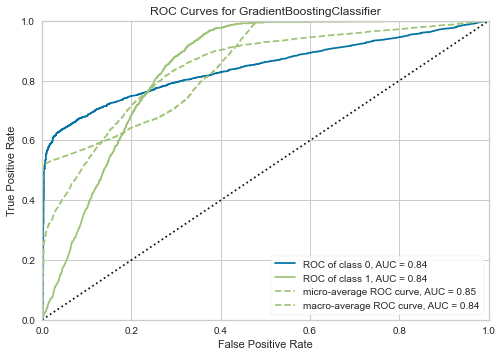

In [15]:
plot_model(gbc)

In [26]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, random_state=5219,
                           subsample=1.0, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)

In [32]:
#Salva o modelo criado
import pickle
pickle.dump(gbc,open('gbc.model','wb'))

In [16]:
#Carrega a base de teste
ds_test = pd.read_csv("test.csv")
ds_test = ds_test.iloc[0:500,:]


In [17]:
ds_test.head()

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110   Male   25                1         11.0                   1   
1  381111   Male   40                1         28.0                   0   
2  381112   Male   47                1         28.0                   0   
3  381113   Male   24                1         27.0                   1   
4  381114   Male   27                1         28.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No         35786.0                 152.0       53  
1    1-2 Year            Yes         33762.0                   7.0      111  
2    1-2 Year            Yes         40050.0                 124.0      199  
3    < 1 Year            Yes         37356.0                 152.0      187  
4    < 1 Year             No         59097.0                 152.0      297

In [24]:
#Realiza a predição na base de teste
estimate = predict_model(gbc, data=ds_test)
estimate

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0    381110    Male   25                1         11.0                   1   
1    381111    Male   40                1         28.0                   0   
2    381112    Male   47                1         28.0                   0   
3    381113    Male   24                1         27.0                   1   
4    381114    Male   27                1         28.0                   1   
..      ...     ...  ...              ...          ...                 ...   
495  381605  Female   52                1         29.0                   1   
496  381606    Male   56                1         28.0                   0   
497  381607    Male   44                1         14.0                   0   
498  381608    Male   68                1         28.0                   0   
499  381609    Male   55                1         43.0                   0   

    Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0      < 1 Year             No         35786.0                 152.0       53   
1      1-2 Year            Yes         33762.0                   7.0      111   
2      1-2 Year            Yes         40050.0                 124.0      199   
3      < 1 Year            Yes         37356.0                 152.0      187   
4      < 1 Year             No         59097.0                 152.0      297   
..          ...            ...             ...                   ...      ...   
495    1-2 Year             No         25302.0                 152.0       94   
496    1-2 Year            Yes          2630.0                  26.0      242   
497    1-2 Year            Yes         33253.0                 124.0      181   
498    1-2 Year            Yes         43381.0                  30.0       12   
499    1-2 Year            Yes         42118.0                 124.0      228   

     Label   Score  
0        0  0.9921  
1        1  0.7921  
2        1  0.7979  
3        0  0.9370  
4        0  0.9886  
..     ...     ...  
495      0  0.9889  
496      1  0.7385  
497      1  0.7890  
498      1  0.6152  
499      1  0.7238  

[500 rows x 13 columns]

In [19]:
calibrated_gbc = calibrate_model(gbc)